In [12]:
import pandas as pd

In [13]:
# Importation de notre base
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
# Supprimer la colonne "car name" qui n'est pas pertinente pour notre analyse
df = df.drop("car name", axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [15]:
# Informations sur les données
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    str    
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), str(1)
memory usage: 25.0 KB


In [16]:
# Statistiques descriptives
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [17]:
# Dimensions du DataFrame
df.shape

(398, 8)

In [20]:
# Nettoyage des données : remplacer les "?" par des valeurs manquantes et convertir en numérique
df["horsepower"]=df["horsepower"].replace("?", pd.NA, inplace=False)
df["horsepower"] = df["horsepower"].astype(float)
df = df.dropna()

In [21]:
# Séparation des données en variables indépendantes (X) et variable dépendante (y)
from sklearn.model_selection import train_test_split

X = df.drop("mpg", axis=1)
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# Entraînement du modèle KNN sans normalisation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("R2:", r2)

MAE: 2.9473417721518986
MSE: 17.752617721518984
RMSE: 4.213385541523465
R2: 0.6521862291798177


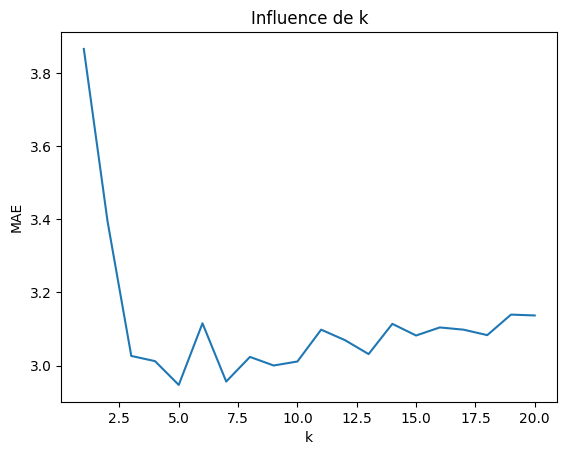

In [24]:
# Influence de k
import matplotlib.pyplot as plt

k_values = range(1, 21)
mae_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae_scores.append(mean_absolute_error(y_test, pred))

plt.plot(k_values, mae_scores)
plt.xlabel("k")
plt.ylabel("MAE")
plt.title("Influence de k")
plt.show()

In [25]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Entraînement du modèle KNN avec normalisation
knn_scaled = KNeighborsRegressor(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred_scaled))
print("MSE:", mean_squared_error(y_test, y_pred_scaled))
print("R2:", r2_score(y_test, y_pred_scaled))

MAE: 2.009113924050633
MSE: 7.167493670886076
R2: 0.8595726534471126


##### Tester d'autres modèles

In [28]:
# Arbre de décision (Decision Tree)
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print("Tree R2:", r2_score(y_test, pred_tree))

Tree R2: 0.785708150067029


In [29]:
# Forêt aléatoire (Random Forest)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("RF R2:", r2_score(y_test, pred_rf))

RF R2: 0.888712085258602


In [30]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)

print("GB R2:", r2_score(y_test, pred_gb))

GB R2: 0.8755810821248818


In [31]:
# Comparaison des modèles
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "KNN non normalisé": KNeighborsRegressor(n_neighbors=5),
    "KNN normalisé": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
}

results = []

for name, model in models.items():
    
    if name == "KNN normalisé":
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    
    results.append([name, mae, mse, np.sqrt(mse), r2])

results_df = pd.DataFrame(results, columns=["Modèle", "MAE", "MSE", "RMSE", "R2"])
results_df.sort_values(by="R2", ascending=False)

,Modèle,MAE,MSE,RMSE,R2
3,Random Forest,1.718557,5.680200,2.383317,0.888712
4,Gradient Boosting,1.783050,6.282894,2.506570,0.876904
1,KNN normalisé,2.009114,7.167494,2.677218,0.859573
2,Decision Tree,2.303246,10.937581,3.307201,0.785708
0,KNN non normalisé,2.947342,17.752618,4.213386,0.652186


In [32]:
# Verifier le surapprentissage du modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Train R2:", model.score(X_train, y_train))
print("Test R2:", model.score(X_test, y_test))

Train R2: 0.9809965599153551
Test R2: 0.888712085258602


In [33]:
# Hyperparameter tuning pour Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Meilleurs paramètres:", grid.best_params_)

Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [34]:
# Évaluation du modèle optimisé
best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)

print("R2 optimisé:", r2_score(y_test, y_pred))

R2 optimisé: 0.888808594650395


       Variable  Importance
1  displacement    0.424064
2    horsepower    0.170463
3        weight    0.141873
0     cylinders    0.135624
5    model year    0.102350
4  acceleration    0.021658
6        origin    0.003970


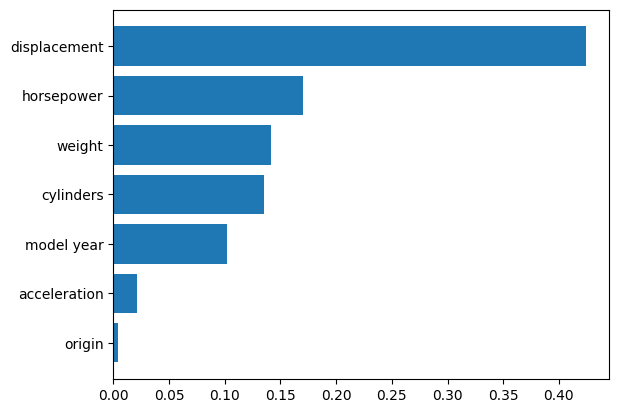

In [35]:
# Importance des variables
importances = best_rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Variable": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)

plt.barh(importance_df["Variable"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.show()

In [43]:
# Sauvegarde du modèle optimisé
from pathlib import Path
import pickle
output_path = Path.cwd() / "auto-mpg.pkl"
with open(output_path, "wb") as f:
    pickle.dump(best_rf, f)

[26.18319781 22.39933307 34.33401706 29.79713955 26.8226212 ]
